In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv("../datasets/svm/letterdata.csv")
df.head(10)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [5]:
df.shape

(20000, 17)

# splitting data 

In [9]:
x = np.array(df)[: , 1:16]
y = np.array(df.letter)[:]

In [11]:
x

array([[2, 8, 3, ..., 0, 8, 0],
       [5, 12, 3, ..., 2, 8, 4],
       [4, 11, 6, ..., 3, 7, 3],
       ...,
       [6, 9, 6, ..., 2, 12, 2],
       [2, 3, 4, ..., 1, 9, 5],
       [4, 9, 6, ..., 2, 7, 2]], dtype=object)

In [13]:
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=0)

In [20]:
x_train.shape

(15000, 15)

In [22]:
y_train.shape

(15000,)

In [24]:
model = svm.SVC(C=3)
model.fit(x_train, y_train)

SVC(C=3)

In [26]:
y_pred = model.predict(x_test)


In [27]:
y_pred

array(['Y', 'B', 'K', ..., 'V', 'U', 'M'], dtype=object)

In [28]:
model.score(x_test, y_test)*100

93.56

In [33]:
y_grid = (np.column_stack([y_test, y_pred]))

In [35]:
y_grid

array([['Y', 'Y'],
       ['B', 'B'],
       ['K', 'K'],
       ...,
       ['V', 'V'],
       ['U', 'U'],
       ['U', 'M']], dtype=object)

In [37]:
y_test

array(['Y', 'B', 'K', ..., 'V', 'U', 'U'], dtype=object)

In [39]:
y_pred

array(['Y', 'B', 'K', ..., 'V', 'U', 'M'], dtype=object)

In [42]:
import string
label = list(string.ascii_uppercase[0:26])
pred_label = ["Pred " + s for s in label]

In [44]:
label

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [46]:
pred_label

['Pred A',
 'Pred B',
 'Pred C',
 'Pred D',
 'Pred E',
 'Pred F',
 'Pred G',
 'Pred H',
 'Pred I',
 'Pred J',
 'Pred K',
 'Pred L',
 'Pred M',
 'Pred N',
 'Pred O',
 'Pred P',
 'Pred Q',
 'Pred R',
 'Pred S',
 'Pred T',
 'Pred U',
 'Pred V',
 'Pred W',
 'Pred X',
 'Pred Y',
 'Pred Z']

In [49]:
from sklearn import metrics
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred, labels= label)

df_cm = pd.DataFrame(cm, index= [i for i in label], 
                    columns= [i for i in pred_label])

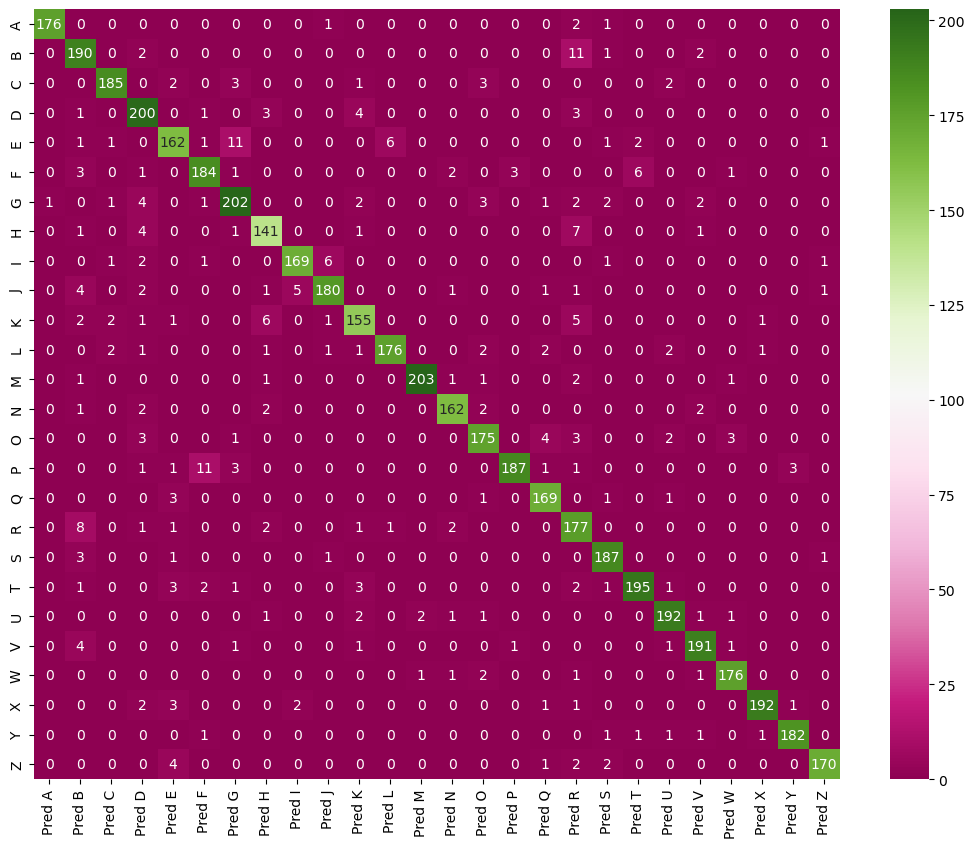

In [51]:
plt.figure(figsize= (13,10))
sns.heatmap(df_cm, annot= True, fmt='g', cmap="PiYG")
plt.show()